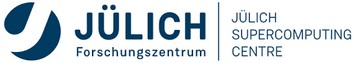 
Author: [Sebastian Lührs](mailto:s.luehrs@fz-juelich.de)
--------------------------------------

# Create your own Jupyter CONDA-Kernel

Often the standard kernel do not provide all features you need for your work. This might be that certain modules are not loaded or packages are not installed.
With your own kernel you can overcome that problem easily and define your own environment, in which you work.

This notebook shows you how you can build your own kernel for a **conda environment**.

--------------------------------------

## Building your own Jupyter CONDA-kernel is a three step process
Download Minconda installer
1. Download/Install Miniconda
   * Miniconda3.sh
2. Create Conda Environment
   * conda create
2. Create/Edit launch script for the Jupyter kernel
   * kernel.sh
3. Create/Edit Jupyter kernel configuration
   * kernel.json

### Settings

Selectable **CONDA_TARGET_DIR** path for the central conda installation, should be in the project filesystem

In [3]:
export CONDA_TARGET_DIR=/p/project/cesmtst/giraud1/miniconda3
#${HOME}/PROJECT_training2211/${USER}/miniconda3

In [4]:
echo $PROJECT

/p/project/cesmtst


Selectable **CONDA_ENV** name, will be used to specify the environment name
  - must be lowercase

In [3]:
CONDA_ENV=py310

export CONDA_ENV=$(echo "${CONDA_ENV}" | awk '{print tolower($0)}')
echo ${CONDA_ENV} # double check

py310


---
## 1. Download/Install Miniconda

Start here if you want to run the full installation.
If you want to create another environment in an existing conda setup go to **create environment**. If you want to attach yourself to an existing environment go to **create user kernel**.

* 1.1 - Download Minconda installer

In [ ]:
wget --output-document=$HOME/Miniconda3.sh https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh

* 1.2 - Create target directory

In [ ]:
mkdir -p ${CONDA_TARGET_DIR}

* 1.3 - Install Miniconda

In [ ]:
bash $HOME/Miniconda3.sh -b -u -p ${CONDA_TARGET_DIR}

In [ ]:
${CONDA_TARGET_DIR}/bin/conda init bash

* 1.4 - Disable automatic activation

In [1]:
# target dir: /p/project/cesmtst/giraud1/miniconda3
#export CONDA_TARGET_DIR=/p/project/cesmtst/giraud1/miniconda3

In [2]:
${CONDA_TARGET_DIR}/bin/conda config --set auto_activate_base false

---
## 2. Create conda environment

Create new conda environment. The following steps can be repeated if multiple environments should be created. If the Python version differ towards the external Python version, a mix of Conda modules and external modules will not be possible

In [5]:
#${CONDA_TARGET_DIR}/bin/conda create -n ${CONDA_ENV} -y python=3.10 ipykernel
#
# To activate this environment, use
#
#     $ conda activate py310
#
# To deactivate an active environment, use
#
#     $ conda deactivate

---
## 3. Create/Edit launch script for the Jupyter kernel

* 3.1 - Create kernel to allow access to the conda environment. Adapte `module purge` and `PYTHONPATH` according to the comments.

In [6]:
echo '#!/bin/bash

module purge # optional to disable the external environment, necessary, if python version is different
 
# Activate your Python virtual environment
source '"${HOME}"'/cpbenv/bin/activate
    
# Ensure python packages installed in conda are always prefered, not necessary if module purge is used
# export PYTHONPATH=${CONDA_PREFIX}/lib/python3.10/site-packages:${PYTHONPATH}
    
exec python -m ipykernel $@' > ${HOME}/cpbenv/kernel.sh

In [1]:
chmod +x ${HOME}/cpbenv/kernel.sh

SyntaxError: invalid syntax (2135921644.py, line 1)

---
## 4. Create/Edit Jupyter kernel configuration

* 4.1 - Create user kernel, if you want to access the conda environment of a colleague, only these steps are necessary

In [8]:
mkdir -p $HOME/.local/share/jupyter/kernels/cpbenv

* 4.2 - Adjust kernel.json file

In [9]:
echo '{
 "argv": [
   "/home/m.giraud/cpbenv/kernel.sh",
   "-f",
   "{connection_file}"
 ],
 "display_name": "cpbenv 3.12",
 "language": "python"
}' > $HOME/.local/share/jupyter/kernels/cpbenv/kernel.json

Restart of JupyterLab might be necessary to see the kernel in the kernel selection overview.